#### This notebook uses the R programming language for data analysis

#### The concept of Partition Around Medoids (PAM) algorithm
In summary, PAM algorithm proceeds in two phases as follow:

Build phase:

1. Select k objects to become the medoids, or in case these objects were provided use them as the medoids;
2. Calculate the dissimilarity matrix if it was not provided;
3. Assign every object to its closest medoid;

Swap phase: 

4. For each cluster search if any of the object of the cluster decreases the average dissimilarity coefficient; if it does, select the entity that decreases this coefficient the most as the medoid for this cluster; 
5. If at least one medoid has changed go to (3), else end the algorithm.
    
The PAM algorithm works with a matrix of dissimilarity, and to compute this matrix the algorithm can use two metrics:

The euclidean distances, that are the root sum-of-squares of differences;
And, the Manhattan distance that are the sum of absolute distances.
    
**Note** 
Note that, in practice, you should get similar results most of the time, using either euclidean or Manhattan distance. If your data contains outliers, Manhattan distance should give more robust results, whereas euclidean would be influenced by unusual values.

#### Computing PAM in R

In [7]:
# load the data
data("USArrests")
df<- scale(USArrests) # Scale the data
head(df,5) # look at the first five rows of the data

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292


In [5]:
# load the required packages
library(cluster)
library(factoextra)
library(fpc)
library(ggplot2) 

The function `pam()` [cluster package] and `pamk()` [fpc package] can be used to compute PAM.

Now lets determine the possible number of clusters in a dataset. As we can see using the function `fviz_nbclust()` generates the plot. From the plot, the suggested number of clusters is 2. In the next section, we’ll classify the observations into 2 clusters.

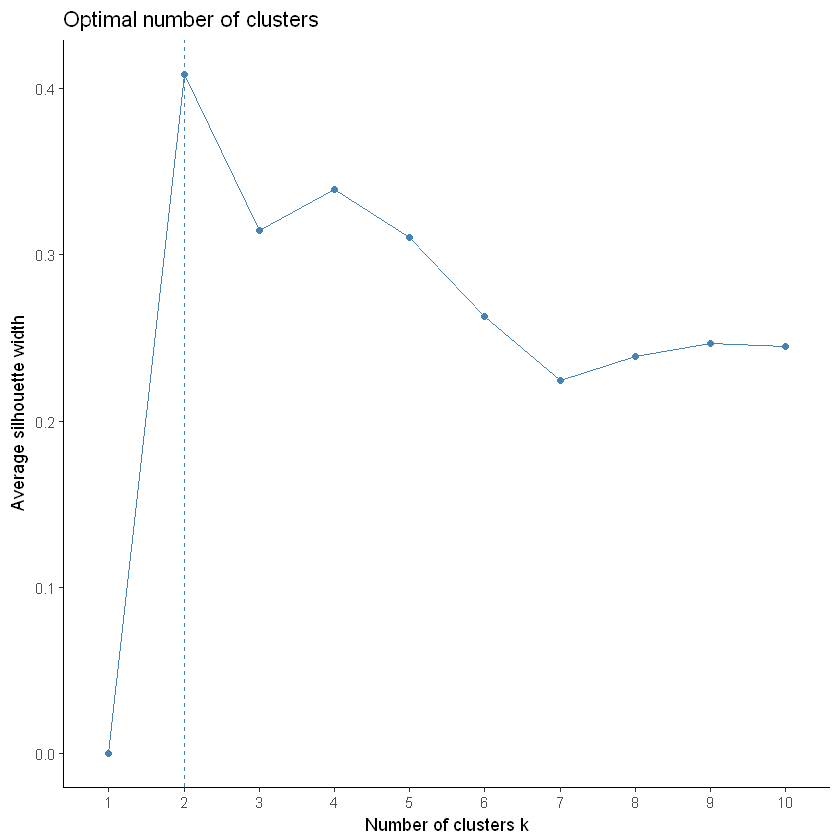

In [8]:
fviz_nbclust(df, pam, method = "silhouette")+
  theme_classic()

Computing PAM clustering

The R code below computes PAM algorithm with k = 2

In [9]:
pam.res <- pam(df, 2)
print(pam.res)

Medoids:
           ID     Murder    Assault   UrbanPop       Rape
New Mexico 31  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   27 -0.8008247 -0.8250772 -0.2445636 -0.5052109
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana       Nebraska         

The printed output shows:

- the cluster medoids: a matrix, which rows are the medoids and columns are variables
- the clustering vector: A vector of integers (from 1:k) indicating the cluster to which each point is allocated

If you want to add the point classifications to the original data, use the following code;

In [10]:
dd <- cbind(USArrests, cluster = pam.res$cluster)
head(dd, n = 3)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1


Accessing to the results of the pam() function

The function pam() returns an object of class pam which components include:

- medoids: Objects that represent clusters
- clustering: a vector containing the cluster number of each object

These components can be accessed as follow;

In [11]:
# Cluster medoids: New Mexico, Nebraska
pam.res$medoids

,Murder,Assault,UrbanPop,Rape
New Mexico,0.8292944,1.3708088,0.3081225,1.1603196
Nebraska,-0.8008247,-0.8250772,-0.2445636,-0.5052109


In [12]:
# cluster numbers
head(pam.res$clustering)

Alabama     Alaska    Arizona   Arkansas California   Colorado 
         1          1          1          2          1          1

Visualizing PAM clusters

To visualize the partitioning results, we’ll use the function `fviz_cluster()` [factoextra package]. It draws a scatter plot of data points colored by cluster numbers. If the data contains more than 2 variables, the Principal Component Analysis (PCA) algorithm is used to reduce the dimensionality of the data. In this case, the first two principal dimensions are used to plot the data.

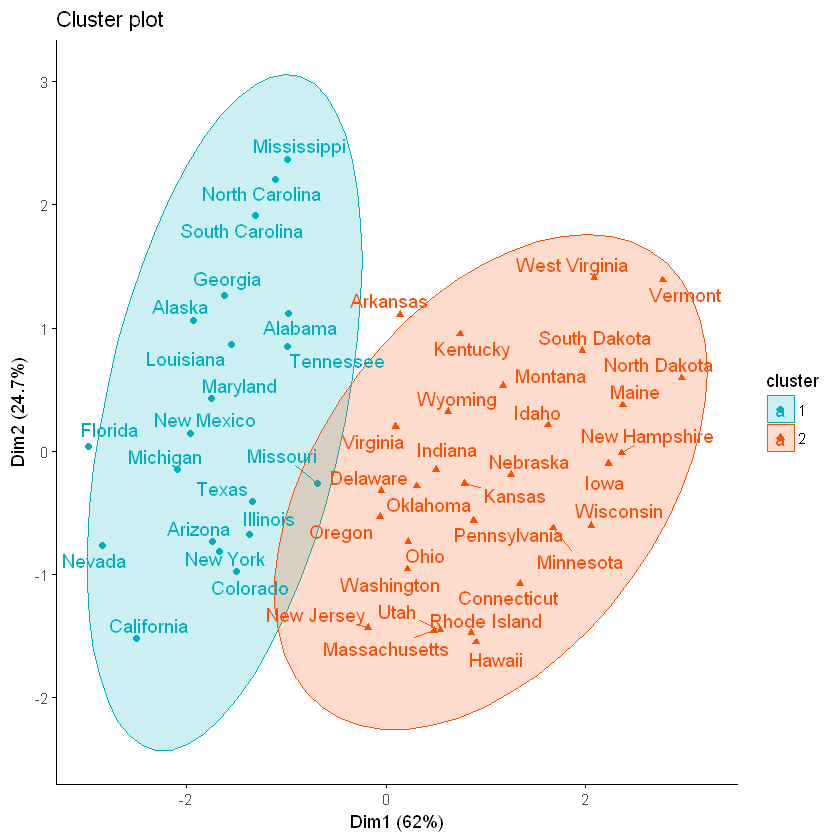

In [13]:
fviz_cluster(pam.res, 
             palette = c("#00AFBB", "#FC4E07"), # color palette
             ellipse.type = "t", # Concentration ellipse
             repel = TRUE, # Avoid label overplotting (slow)
             ggtheme = theme_classic()
             )

Summary

The K-medoids algorithm, PAM, is a robust alternative to k-means for partitioning a data set into clusters of observation.

In k-medoids method, each cluster is represented by a selected object within the cluster. The selected objects are named medoids and corresponds to the most centrally located points within the cluster.

The PAM algorithm requires the user to know the data and to indicate the appropriate number of clusters to be produced. This can be estimated using the function `fviz_nbclust` [in factoextra R package].

The R function `pam()` [cluster package] can be used to `compute PAM algorithm`. The simplified format is `pam(x, k)`, where `“x” is the data and k is the number of clusters to be generated`.

After, performing PAM clustering, the R function `fviz_cluster()` [factoextra package] can be used to visualize the results. The format is `fviz_cluster(pam.res)`, where pam.res is the PAM results.

References

Kaufman, Leonard, and Peter Rousseeuw. 1990. Finding Groups in Data: An Introduction to Cluster Analysis